<a href="http://landlab.github.io"><img style="float: left" src="../../landlab_header.png"></a>

# Using the Landlab `FractureGridGenerator` component

*(Greg Tucker, University of Colorado Boulder, July 2021)*


## Introduction

Landlab' `FractureGridGenerator` is a small helper component that generates a grid in which are embedded a set of randomly aligned fractures. A fracture is described by a line of nodes for which the field `fracture_at_node` equals 1. In other words, nodes where `fracture_at_node = 1` contain one or more fractures running through or near them, and nodes where `fracture_at_node = 0` are devoid of fractures. The component was originally written to initialize a cellular automaton model of rock weathering along fracture zones. An example of a gridded fracture network used in this way can be found in [Tucker et al. (2016)](https://doi.org/10.5194/gmd-9-823-2016) Figure 9.

## Simple example with a raster grid



In [1]:
import copy
import numpy as np
import matplotlib as mpl
from landlab import RasterModelGrid, imshow_grid
from landlab.components import FractureGridGenerator

/Users/gtucker/Dev/Landlab/landlab/landlab/plot/imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


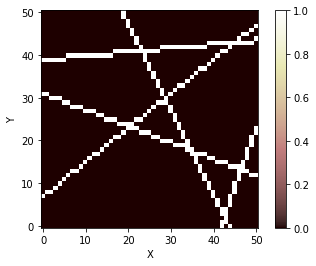

In [2]:
grid = RasterModelGrid((51, 51))
fg = FractureGridGenerator(grid, frac_spacing=20)
fg.run_one_step()
cmap = copy.copy(mpl.cm.get_cmap("pink"))
imshow_grid(grid, grid.at_node['fracture_at_node'], cmap=cmap)

## Example with a hex grid

This example also shows how you can use the optional `seed` parameter to get a different random pattern.

In [3]:
from landlab import HexModelGrid

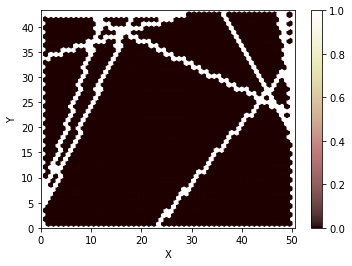

In [7]:
grid = HexModelGrid((51, 51), node_layout='rect')
fg = FractureGridGenerator(grid, frac_spacing=10, seed=4)
fg.run_one_step()
cmap = copy.copy(mpl.cm.get_cmap("pink"))
imshow_grid(grid, grid.at_node['fracture_at_node'], cmap=cmap)

### Vertically oriented hex grid

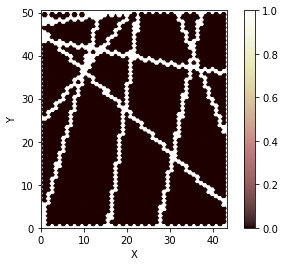

In [5]:
grid = HexModelGrid((51, 51), node_layout='rect', orientation='vertical')
fg = FractureGridGenerator(grid, frac_spacing=10, seed=3)
fg.run_one_step()
cmap = copy.copy(mpl.cm.get_cmap("pink"))
imshow_grid(grid, grid.at_node['fracture_at_node'], cmap=cmap)

## References

Tucker, G. E., Hobley, D. E., Hutton, E., Gasparini, N. M., Istanbulluoglu, E., Adams, J. M., & Nudurupati, S. S. (2016). CellLab-CTS 2015: continuous-time stochastic cellular automaton modeling using Landlab. Geoscientific Model Development, 9(2), 823-839, [https://doi.org/10.5194/gmd-9-823-2016](https://doi.org/10.5194/gmd-9-823-2016).